In [22]:
import pandas as pd

from matplotlib import pyplot as plt

Orgs is largest file. NOTE: shouldn't we be using Investors.csv instead?

In [101]:
# By default, I want to see everything

pd.set_option("display.max_rows", 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
orgs = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/organizations.csv")
orgs.category_list = orgs.category_list.str.split(",")
orgs.category_groups_list = orgs.category_groups_list.str.split(",")
len(orgs)

3862971

In [52]:
investments = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/investments.csv")
len(investments)

1174990

In [53]:
funding_rounds = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/funding_rounds.csv")
len(funding_rounds)

711238

In [54]:
investors = pd.read_csv("/Users/dwidder/Desktop/Crunchbase data/12-apr-2025-bulk_export/investors.csv")
len(investors)

300934

In [55]:
# Set keys to be UUID where applicable

investors = investors.set_index("uuid")
orgs = orgs.set_index("uuid")
funding_rounds = funding_rounds.set_index("uuid")

## What I want:

1. 3 line graphs, one per cloud company (stored in "Investors"):
2. Amount of funding (in "Funding_rounds") over time, 
3. One line per category—eg, military ("category_list", "category_groups_list" in orgs) on each graph 


## Questions I need to answer:
- Do I wany any funding round that any BigCloud participated in? Or only those where they were lead investor?

In [56]:
# Filter to big cloud investors
cloud_investors = investors[investors.name.str.match("Microsoft|Amazon|Google", na=False)]

In [57]:
# so I THINK this tells us that there are some funding rounds with multiple recorded investments. 
# but that not all funding rounds have recorded investments. 

print(len(investments.funding_round_uuid), len(investments.funding_round_uuid.unique()), len(funding_rounds))

1174990 538519 711238


In [58]:
cloud_investments = investments.join(cloud_investors, 
                 how="inner",
                 on="investor_uuid", 
                 rsuffix="_investor", 
                 validate="many_to_one")

cloud_investments

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,name_investor,type_investor,permalink_investor,cb_url_investor,rank_investor,created_at_investor,updated_at_investor,roles,domain,country_code,state_code,region,city,investor_types,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
346,b43dc207-fb9f-23ea-e985-7ba37d291574,Amazon investment in Series B - Fandom,investment,amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,https://www.crunchbase.com/investment/amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,NaN,2007-07-31 06:51:29,2018-02-13 00:55:07,2a644bf4-1728-5c3a-b88a-466f2b94d160,Series B - Fandom,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
402,09068243-cb88-0615-e91c-28cace08910c,Amazon investment in Series A - Amie Street,investment,amazon-invested-in-amiestreet-series-a--df452f16--09068243,https://www.crunchbase.com/investment/amazon-invested-in-amiestreet-series-a--df452f16--09068243,NaN,2007-08-06 21:59:16,2018-02-13 00:51:17,df452f16-5112-63fe-b043-f7fb2611c36e,Series A - Amie Street,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,True,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
481,33eceba6-8370-e6df-1442-f523f6d0bd61,Amazon investment in Seed Round - Delicious,investment,amazon-invested-in-delicious-seed--66da71ce--33eceba6,https://www.crunchbase.com/investment/amazon-invested-in-delicious-seed--66da71ce--33eceba6,NaN,2007-08-15 09:31:41,2018-02-13 00:52:12,66da71ce-b1e9-0c0e-929d-5d03c46f1e41,Seed Round - Delicious,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j
876,391bb0ee-2097-8210-180f-2562cd33413c,Google investment in Series A - 23andMe,investment,google-invested-in-23andme-series-a--f261366b--391bb0ee,https://www.crunchbase.com/investment/google-invested-in-23andme-series-a--f261366b--391bb0ee,NaN,2007-10-15 17:17:12,2018-02-13 00:52:18,f261366b-4fbf-1840-ad71-b20ea0d9c7ce,Series A - 23andMe,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,organization,True,Google,organization,google,https://www.crunchbase.com/organization/google,361.0,2014-04-20 16:16:56,2024-09-17 15:11:58,"company,investor",google.com,USA,CA,California,Mountain View,NaN,313.0,2.610000e+07,2.610000e+07,USD,1998-09-04,NaN,https://www.facebook.com/Google,https://www.linkedin.com/company/google,https://x.com/google,https://images.crunchbase.com/image/upload/t_cb-default-original/fa8nmvofinznny6rkwvf
944,3dcca197-4a72-a1d3-fbde-ad4fa5429b66,Microsoft investment in Series C - Meta,investment,microsoft-invested-in-facebook-series-c--c26d2da6--3dcca197,https://www.crunchbase.com/investment/microsoft-invested-in-facebook-series-c--c26d2da6--3

In [59]:
cloud_investments_framts = cloud_investments.join(funding_rounds[["name", "org_name", "org_uuid", "raised_amount_usd"]], 
                 how="inner",
                 on="funding_round_uuid", 
                 rsuffix="_fr", 
                 validate=None)

In [60]:
cloud_investments_org_amts = cloud_investments_framts.join(orgs[["name", "category_list", "category_groups_list", "short_description"]],
                                                             how="inner",
                                                             on="org_uuid",
                                                             rsuffix="_org")

In [61]:
cloud_investments_org_amts

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,name_investor,type_investor,permalink_investor,cb_url_investor,rank_investor,created_at_investor,updated_at_investor,roles,domain,country_code,state_code,region,city,investor_types,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url,name_fr,org_name,org_uuid,raised_amount_usd,name_org,category_list,category_groups_list,short_description
346,b43dc207-fb9f-23ea-e985-7ba37d291574,Amazon investment in Series B - Fandom,investment,amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,https://www.crunchbase.com/investment/amazon-invested-in-wikia-series-b--2a644bf4--b43dc207,NaN,2007-07-31 06:51:29,2018-02-13 00:55:07,2a644bf4-1728-5c3a-b88a-466f2b94d160,Series B - Fandom,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Series B - Fandom,Fandom,e84e93ea-a32f-cc22-e3d8-a44fe89764f8,10000000.0,Fandom,"[Communities, E-Commerce, Gaming, Internet, Media and Entertainment, Video, Video Games]","[Commerce and Shopping, Community and Lifestyle, Gaming, Internet Services, Media and Entertainment, Video]","Fandom is a developer of an entertainment media platform designed for fans to explore, contribute to, and celebrate."
402,09068243-cb88-0615-e91c-28cace08910c,Amazon investment in Series A - Amie Street,investment,amazon-invested-in-amiestreet-series-a--df452f16--09068243,https://www.crunchbase.com/investment/amazon-invested-in-amiestreet-series-a--df452f16--09068243,NaN,2007-08-06 21:59:16,2018-02-13 00:51:17,df452f16-5112-63fe-b043-f7fb2611c36e,Series A - Amie Street,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,True,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Series A - Amie Street,Amie Street,ff9aad78-dde3-4857-fea6-66e5c1ce98dd,NaN,Amie Street,"[Media and Entertainment, Music, Music Streaming]","[Internet Services, Media and Entertainment, Music and Audio]","Amie Street is a web-based social music store that enables members to discover, download and share music."
481,33eceba6-8370-e6df-1442-f523f6d0bd61,Amazon investment in Seed Round - Delicious,investment,amazon-invested-in-delicious-seed--66da71ce--33eceba6,https://www.crunchbase.com/investment/amazon-invested-in-delicious-seed--66da71ce--33eceba6,NaN,2007-08-15 09:31:41,2018-02-13 00:52:12,66da71ce-b1e9-0c0e-929d-5d03c46f1e41,Seed Round - Delicious,05554f65-6aa9-4dd1-6271-8ce2d60f10c4,Amazon,organization,NaN,Amazon,organization,amazon,https://www.crunchbase.com/organization/amazon,1953.0,2014-05-20 14:56:44,2024-09-18 08:27:18,"company,investor",amazon.com,USA,WA,Washington,Seattle,NaN,158.0,8.108000e+09,8.108000e+09,USD,1994-07-05,NaN,https://www.facebook.com/Amazon,https://www.linkedin.com/company/amazon,https://x.com/amazon,https://images.crunchbase.com/image/upload/t_cb-default-original/mwsza2s38epb8olssp3j,Seed Round - Delicious,Delicious,b6786d44-5bac-b00a-32ab-067fc845c173,NaN,Delicious,"[Social Bookmarking, Social Media]","[Content and Publishing, Internet Services, Media and Entertainment, Other]",Delicious is a social bookmarking website whi

In [63]:
cloud_investors = investors[investors.name.str.match("Microsoft|Amazon|Google", na=False)]

In [64]:
cat_dict = {"Microsoft":"Microsoft", "Amazon":"Amazon", "Google": "Google"}


In [65]:
cloud_investments_org_amts['big_cloud'] = (cloud_investments_org_amts['investor_name']
                                           .str.extract(fr"\b({'|'.join(cat_dict.keys())})\b")[0].map(cat_dict)
                 )

In [66]:
cloud_investments_org_amts['big_cloud'].value_counts()

big_cloud
Google       3456
Microsoft    1359
Amazon        516
Name: count, dtype: int64

In [103]:
# Examples of Big Cloud investing in the Military!

cloud_investments_org_amts[cloud_investments_org_amts.category_list.fillna("NAN").map(lambda x: "Military" in x)]

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor,name_investor,type_investor,permalink_investor,cb_url_investor,rank_investor,created_at_investor,updated_at_investor,roles,domain,country_code,state_code,region,city,investor_types,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url,name_fr,org_name,org_uuid,raised_amount_usd,name_org,category_list,category_groups_list,short_description,big_cloud
752051,c23013fd-437f-4520-a5d2-e8eb0348d19c,Amazon Web Services investment in Seed Round - U22,investment,amazon-web-services-invested-in-u22-seed--0ac8b32d--c23013fd,https://www.crunchbase.com/investment/amazon-web-services-invested-in-u22-seed--0ac8b32d--c23013fd,NaN,2022-05-28 16:27:47,2022-05-28 16:27:47,0ac8b32d-e82b-4169-9c4c-fdec61e46e3b,Seed Round - U22,bd23a50d-2ae3-be33-2a35-383ea9ed13fd,Amazon Web Services,organization,NaN,Amazon Web Services,organization,amazon-web-services,https://www.crunchbase.com/organization/amazon-web-services,17664.0,2010-09-25 03:51:34,2024-09-19 08:59:49,"company,investor",aws.amazon.com,USA,WA,Washington,Seattle,NaN,148.0,NaN,NaN,NaN,2002-07-16,NaN,https://www.facebook.com/amazonwebservices,https://www.linkedin.com/company/amazon-web-services,https://x.com/awscloud,https://images.crunchbase.com/image/upload/t_cb-default-original/r4wsu8rl4jvpjydbhooy,Seed Round - U22,U22,8e103eb5-d2e6-4814-ba21-6f906a22c1b9,111500.0,U22,"[Government, Information Technology, Media and Entertainment, Military, Social Media, Video, Video Streaming]","[Content and Publishing, Government and Military, Information Technology, Internet Services, Media and Entertainment, Video]",U22 is a media streaming platform.,Amazon
1036538,0047d7a7-d0fb-4859-aa86-4986ebc34b6e,Google.org investment in Grant - Institute for Veterans and Military Families - IVMF,investment,google-org-invested-in-institute-for-veterans-and-military-families-ivmf-grant--0aea829f--0047d7a7,https://www.crunchbase.com/investment/google-org-invested-in-institute-for-veterans-and-military-families-ivmf-grant--0aea829f--0047d7a7,NaN,2024-05-03 08:28:05,2024-05-03 08:28:05,0aea829f-f89a-4404-98d9-460f821b4711,Grant - Institute for Veterans and Military Families - IVMF,292d67c5-4be0-2255-eded-dee2f78d5a58,Google.org,organization,True,Google.org,organization,google-org,https://www.crunchbase.com/organization/google-org,5920.0,2015-12-04 05:58:19,2024-05-18 08:38:28,investor,google.org,USA,CA,California,Mountain View,corporate_venture_capital,85.0,NaN,NaN,NaN,2005-10-01,NaN,https://www.facebook.com/google,NaN,https://www.twitter.com/Googleorg,https://images.crunchbase.com/image/upload/t_cb-default-original/v1456515561/e0akfyhz6v3jf5vgks4g.png,Grant - Institute for Veterans and Military Families - IVMF,Institute for Veterans and Military Families - IVMF,0e8bfe7c-a24c-42a0-8353-d068c17ccf10,3500000.0,Institute for Veterans and Military Families - IVMF,"[Education, Military]","[Education, Government and Military, Information Technology]","Institute for Veterans and Military Families - IVMF provides programs and services to veterans, service members, and military families.",Google
1159202,43fa3d4e-e09e-4af3-8e46-5360ce02dab1,Microsoft for Startups investment in Pre Seed Round - RequestPool,investment,microsoft-for-startups-invested-in-requestpool-pre-seed--87b17674--43fa3d4e,https://www.crunchbase.com/investment/microsoft-for-startups-invested-in-requestpool-pre-seed--87b17674--43fa3d4e,NaN,2025-02-26 10:51:54,2025-02-26 10:51:54,87b17674-752f-47aa-bbaa-15f52252e32d,Pre Seed Round - RequestPool,c50719bd-93ac-4ed7-96ae-99ac3b3a8beb,Microsoft for Startups,organization,False,Microsoft for Startups,organization,microsoft-for-startups,https://www.crunchbase.com/organization/microsoft-for-startups,242743.0,2019-08-15 16:53:14,2024-05-28 11:01:23,investor,startups.microsoft.com,US

# Who are the investors?

In [136]:
# This lets you search investments by investor name, and see how many times they've invested

investments["investor_name"][investments.investor_name.str.contains("Palantir", na=False)].value_counts()

investor_name
Palantir Technologies    13
Palantir Capital          8
Name: count, dtype: int64

In [43]:
# Coarse grained categories

pd.Series([element for list_ in orgs.category_groups_list.dropna() for element in list_]).value_counts()

Software                            703514
Professional Services               652416
Other                               563261
Manufacturing                       540634
Information Technology              502615
Commerce and Shopping               496509
Real Estate                         446894
Financial Services                  446060
Media and Entertainment             445954
Health Care                         426774
Sales and Marketing                 415190
Internet Services                   344776
Design                              334979
Science and Engineering             328594
Hardware                            300822
Education                           237403
Transportation                      232957
Administrative Services             195071
Data and Analytics                  188459
Advertising                         183475
Community and Lifestyle             165102
Food and Beverage                   156173
Consumer Goods                      145648
Content and

In [102]:
# Fine grained categories

pd.DataFrame(pd.Series([element for list_ in orgs.category_list.dropna() for element in list_]).value_counts() )

,count
Manufacturing,434345
Consulting,384407
Software,383190
Information Technology,364348
Health Care,314832
Financial Services,254193
E-Commerce,229208
Advertising,175873
Real Estate,173590
Industrial,154378


In [41]:
# Most common coarse grained categories of org:

coarse = pd.Series([element for list_ in orgs.category_groups_list.dropna() for element in list_]).value_counts()

<Axes: >

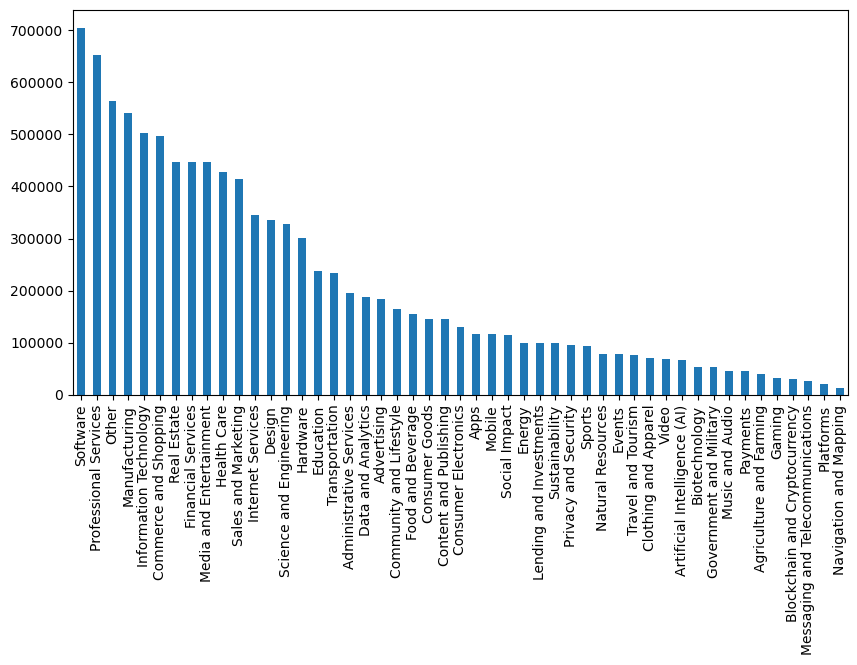

In [42]:
coarse.plot(kind="bar", figsize=(10, 5))

In [46]:
# Most common fine grained categories of org:

fine = pd.Series([element for list_ in orgs.category_list.dropna() for element in list_]).value_counts()

In [47]:
fine

Manufacturing             434345
Consulting                384407
Software                  383190
Information Technology    364348
Health Care               314832
                           ...  
RISC                          12
Generation Y                  12
Darknet                        9
Roku                           6
Ultimate Frisbee               6
Name: count, Length: 800, dtype: int64

## Graphing example

In [ ]:
import pandas as pd
categorical = ["cat1","cat1","cat2","cat3","cat2","cat1","cat3","cat2",
               "cat1","cat3","cat3","cat3","cat2","cat1","cat2","cat3",
               "cat2","cat2","cat3","cat1","cat1","cat1","cat3"]
year = [2013,2014,2013,2015,2014,2014,2013,2014,2014,2015,2015,2013,
        2014,2014,2013,2014,2015,2015,2015,2013,2014,2015,2013]
df = pd.DataFrame({'categorical':categorical,
                   'year':year})


In [ ]:
# reset_index() gives a column for counting, after groupby uses year and category
ctdf = (cloud_investments_org_amts
          .groupby(['created_at','big_cloud'], as_index=False)
          ["raised_amount_usd"].sum()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'investment sum'})
       )

In [ ]:
cloud_investments_org_amts["created_at"] = pd.to_datetime(cloud_investments_org_amts["created_at"])

In [ ]:
cloud_investments_org_amts["created_at"]

In [ ]:
cloud_investments_org_amts["created_at"] = cloud_investments_org_amts["created_at"].dt.year

In [ ]:
cloud_investments_org_amts[["name", "big_cloud", "created_at", "raised_amount_usd", "cb_url"]]

In [ ]:
ctdf

In [ ]:

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('big_cloud'):
    data.plot(x='created_at', y='raised_amount_usd', ax=ax, label=key)

In [ ]:


y = ctdf["raised_amount_usd"]
x = ctdf["created_at"]

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y, 'tab:orange')
ax3.plot(x, y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()
    


# Below here be dragons

Where I will keep code that I don't need but want to keep. 